# 닮은꼴 찾기
---

# 환경

* Ubuntu 18.04
* TensorFlow 2.4.1
* scikit learn 0.23.0
* numpy 1.19.5
* Keras 2.4.3
* conda 4.10.1
* dlib 19.9.0

# 패키지 및 라이브러리 불러오기

In [1]:
import os
import numpy as np
import face_recognition
from PIL import Image
import cv2

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# 1
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images_celeb/'

# 2
image_file = os.listdir(dir_path)
# print(image_file)

# 얼굴 영역

In [3]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if face_locations:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
        return cropped_face
    else:
        return []   
    '''
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face
    '''

<AxesSubplot:>

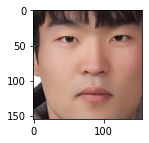

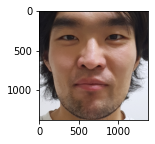

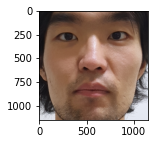

In [4]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_celeb/jeon_328.jpg'
image_path1 = os.getenv('HOME')+'/aiffel/face_embedding/images_celeb/jeon_329.jpg'
image_path2 = os.getenv('HOME')+'/aiffel/face_embedding/images_celeb/jeon_330.jpg'

cropped_face = get_cropped_face(image_path) # 얼굴영역 구하는 함수

# 내 사진 시각화
img_visualize_1 = get_cropped_face(image_path )
img_visualize_2 = get_cropped_face(image_path1)
img_visualize_3 = get_cropped_face(image_path2)

f, axs = plt.subplots(1,1,figsize=(2,2))
plt.imshow(img_visualize_1)

f, axs = plt.subplots(1,1,figsize=(2,2))
plt.imshow(img_visualize_2)

f, axs = plt.subplots(1,1,figsize=(2,2))
plt.imshow(img_visualize_3)

axs

# 얼굴 임베딩 추출

In [5]:
!ls

face_embedding_find-Copy1.ipynb  grop_img      images
face_embedding_find.ipynb	 image_celeb1  images_celeb


In [6]:
image_file = os.getenv('HOME')+'/aiffel/face_embedding/images_celeb/jeon_328.jpg'  # os.path.join(dir_path, 'jeon_328.jpg')
print(image_file)

face = get_cropped_face(image_file) # 얼굴 영역을 구하는 함수  

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
# embedding

/aiffel/aiffel/face_embedding/images_celeb/jeon_328.jpg


In [7]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    cropped_dict = {}          # face detection이 안된 사진 처리용 빈 dict

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face == []:
            continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            # splitext = file, extension
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            cropped_dict[os.path.splitext(file)[0]] = face              # 추가

    return embedding_dict, cropped_dict

In [8]:
# rm -R .ipynb_checkpoints
# 노트북 체크포인트 지우기

embedding_dict, cropped_dict = get_face_embedding_dict(dir_path) # dir_path
# embedding_dict['jeon_328']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


In [9]:
# 내 사진 비교

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

print(get_distance('jeon_328','jeon_329'))
print(get_distance('jeon_329','jeon_330'))

0.39895455916845557
0.2775253173531315


# 연예인 얼굴 비교

In [10]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [11]:
def get_nearest_face(name, top=4):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return sorted_faces, sort_key_func

In [12]:
# sorted_faces를 여기서 불러줘야 아래에서 사용할 수 있음.
sorted_faces, key = get_nearest_face('jeon_328', 8)
print('-'*30)
sorted_faces, key = get_nearest_face('jeon_329', 8)
print('-'*30)
sorted_faces, key = get_nearest_face('jeon_330', 8)

순위 1 : 이름(jeon_330), 거리(0.377620882443308)
순위 2 : 이름(jeon_329), 거리(0.39895455916845557)
순위 3 : 이름(안재홍), 거리(0.4006026125818681)
순위 4 : 이름(이제훈), 거리(0.43431260247788317)
순위 5 : 이름(윤균상), 거리(0.44331973003293973)
순위 6 : 이름(류현진), 거리(0.4584467488208605)
순위 7 : 이름(이대형), 거리(0.46930853535201283)
순위 8 : 이름(디오), 거리(0.47374262873522344)
------------------------------
순위 1 : 이름(jeon_330), 거리(0.2775253173531315)
순위 2 : 이름(jeon_328), 거리(0.39895455916845557)
순위 3 : 이름(이대형), 거리(0.4247978746098168)
순위 4 : 이름(개리), 거리(0.4531405700742577)
순위 5 : 이름(이근대위), 거리(0.453738786699454)
순위 6 : 이름(안재홍), 거리(0.45806412433101906)
순위 7 : 이름(온앤오프효진), 거리(0.4654404184864579)
순위 8 : 이름(심수창), 거리(0.46674244276344184)
------------------------------
순위 1 : 이름(jeon_329), 거리(0.2775253173531315)
순위 2 : 이름(jeon_328), 거리(0.377620882443308)
순위 3 : 이름(이대형), 거리(0.41161745722956866)
순위 4 : 이름(안재홍), 거리(0.42328063928413195)
순위 5 : 이름(RM), 거리(0.4299715656871825)
순위 6 : 이름(이천수), 거리(0.4435631479731782)
순위 7 : 이름(개리), 거리(0.4518689719852967)
순위 8

# 다양한 시각화 시도

닮은 연예인 비교 1번째 : jeon_329
닮은 연예인 비교 2번째 : jeon_328
닮은 연예인 비교 3번째 : 이대형
닮은 연예인 비교 4번째 : 안재홍
닮은 연예인 비교 5번째 : RM


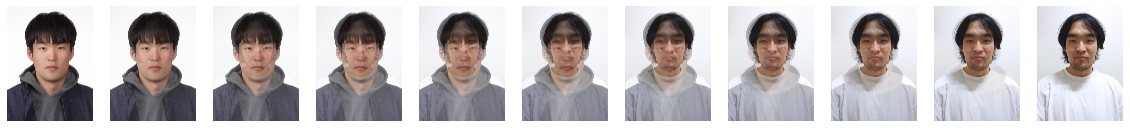

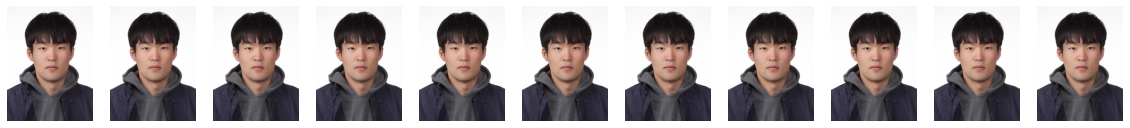

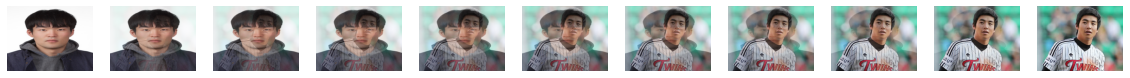

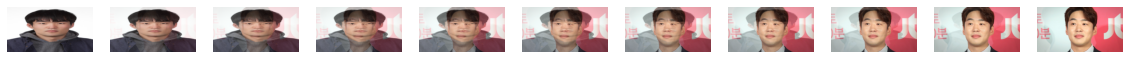

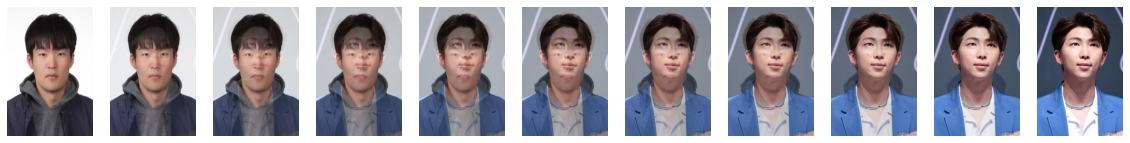

In [16]:
img2 = cv2.imread(dir_path + 'jeon_328.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

for k in range(5):
    a = 0.0
    i = 0

    fig, axes = plt.subplots(1, 11, figsize=(20, 20))
    
    img1 = cv2.imread(dir_path + sorted_faces[k+1][0] + '.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    
    print('닮은 연예인 비교 {}번째 : {}'.format(k+1 , sorted_faces[k+1][0]))
    
    while(i < 11):
        # 블렌딩하는 두 이미지의 크기가 같아야함
        width = img1.shape[1]
        height = img1.shape[0]
        img2 = cv2.resize(img2, (width, height))

        # img1 사진은 점점 투명해지고 img2 사진은 점점 불투명해짐
        b = 1.0 - a
        distance = cv2.addWeighted(img1, a, img2, b, 0)
        axes[i].imshow(distance)
        axes[i].axis('off')
        a = a + 0.1
        i = i +1

# 참고
* 내 사진 3장이 같이 들어있는 폴더에 넣었기 때문에 순위 1,2위가 내 얼굴과 가장 가까운 내 사진이 나왔음
 * 앞의 내 사진 2개를 제외한 순위를 확인하면 됨(순위 3번부터 시작)
 * Jeon_328은 안재홍, Jeon_329은 이대형, Jeon_330은 이대형
 
* 예외처리를 하는 부분에서 많은 시간을 소요했다.
 * image가 정상적으로 cropped가 안되거나 혹은 모든 png 파일은 아니지만 거의 대부분의 png파일의 shape는 ( *, *, 4)로 나와서 3으로 바꾸거나 지워야했는데 지우는 쪽을 택했다.
 * image cropped이 안되는 파일은 당연히 embedding도 안되어서 error가 나는 것이였으며 cropped이 안되는 부분은 따로 담아서 보관하였다.